# 一维随机变量的分布

## 一维离散型随机变量的分布

1. 0-1分布
2. 2项分布
3. 伯努利分布
4. 泊松分布

## 一维连续性随机变量的分布

1. 指数分布
2. 正态分布
3. 卡方分布
4. t分布
5. F分布

# sympy用法

## subs

这个用于把表达式当中的值替换成其他的表达式或者数值

## factorial

这个用于求阶乘

## summations

这个用于求离散型运算的和，比如求泊松分布

## integrate

这个用于求连续性函数的积分，比如分段函数

## 常用的概率分布函数

下面的存在一些问题，就是pmf貌似已经用不成了，我实验了几次没有成功
以下是 SymPy 中常用的概率分布及其用法的简洁总结：

### 1. 正态分布（Normal Distribution）
- **函数**: `sympy.stats.Normal(name, mu, sigma)`
- **PDF**: `sympy.stats.density(distribution)(x)`
- **CDF**: `sympy.stats.cdf(distribution)(x)`

### 2. 泊松分布（Poisson Distribution）
- **函数**: `sympy.stats.Poisson(name, lambda_)`
- **PMF**: `sympy.stats.pmf(distribution, k)`
- **CDF**: `sympy.stats.cdf(distribution)(k)`

### 3. 指数分布（Exponential Distribution）
- **函数**: `sympy.stats.Exponential(name, lambda_)`
- **PDF**: `sympy.stats.density(distribution)(x)`
- **CDF**: `sympy.stats.cdf(distribution)(x)`

### 4. 伯努利分布（Bernoulli Distribution）
- **函数**: `sympy.stats.Bernoulli(name, p)`
- **PMF**: `sympy.stats.pmf(distribution, k)`
- **CDF**: `sympy.stats.cdf(distribution)(k)`

### 5. 二项分布（Binomial Distribution）
- **函数**: `sympy.stats.Binomial(name, n, p)`
- **PMF**: `sympy.stats.pmf(distribution, k)`
- **CDF**: `sympy.stats.cdf(distribution)(k)`

### 6. 几何分布（Geometric Distribution）
- **函数**: `sympy.stats.Geometric(name, p)`
- **PMF**: `sympy.stats.pmf(distribution, k)`
- **CDF**: `sympy.stats.cdf(distribution)(k)`

### 7. 超几何分布（Hypergeometric Distribution）
- **函数**: `sympy.stats.Hypergeometric(name, N, K, n)`
- **PMF**: `sympy.stats.pmf(distribution, k)`
- **CDF**: `sympy.stats.cdf(distribution)(k)`

### 8. 卡方分布（Chi-Square Distribution）
- **函数**: `sympy.stats.ChiSquare(name, k)`
- **PDF**: `sympy.stats.density(distribution)(x)`
- **CDF**: `sympy.stats.cdf(distribution)(x)`

### 9. t 分布（Student's t Distribution）
- **函数**: `sympy.stats.T(name, nu)`
- **PDF**: `sympy.stats.density(distribution)(x)`
- **CDF**: `sympy.stats.cdf(distribution)(x)`

### 10. F 分布（F Distribution）
- **函数**: `sympy.stats.F(name, d1, d2)`
- **PDF**: `sympy.stats.density(distribution)(x)`
- **CDF**: `sympy.stats.cdf(distribution)(x)`

### 用法概述
- **PDF** (Probability Density Function): 计算连续分布在给定点的概率密度。
- **PMF** (Probability Mass Function): 计算离散分布在给定点的概率质量。
- **CDF** (Cumulative Distribution Function): 计算随机变量小于或等于给定值的累积概率。



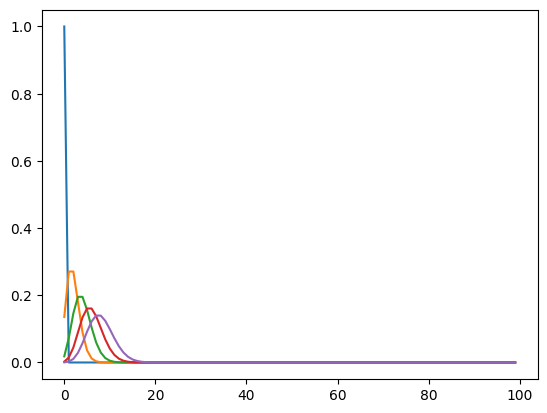

In [18]:
import sympy as sp
from matplotlib import pyplot as plt
lmda = sp.symbols("lambda")

def P(x):
    return (lmda ** x * sp.exp(-lmda))/sp.factorial(x)

X = range(0, 100)

for i in range(0, 10, 2):
    p = [sp.N(P(x).subs(lmda, i)) for x in X]
    plt.plot(X, p)
    
plt.show()

(-lambda**(-x - 1)*lambda**(x + 1)*(x + 1)*exp(lambda)*lowergamma(x + 1, lambda)/gamma(x + 2) + exp(lambda))*exp(-lambda)
lambda


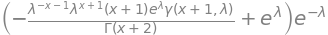

In [68]:
# 计算泊松分布的期望值
import sympy as sp
# 初始化数学符号的显示
sp.init_printing()
# 定义符号变量
x, k, lmda = sp.symbols('x k lambda')

# 定义泊松分布的概率质量函数 (PMF)
P_k = (lmda**k * sp.exp(-lmda)) / sp.factorial(k)

# 计算泊松分布的累积分布函数 (CDF)
F_x = sp.summation(P_k, (k, 0, x))

excepted_value = sp.summation(k * P_k, (k, 0, sp.oo))
print(F_x)
print(excepted_value)
F_x



b/(-a + b) - Min(a, b)/(-a + b)


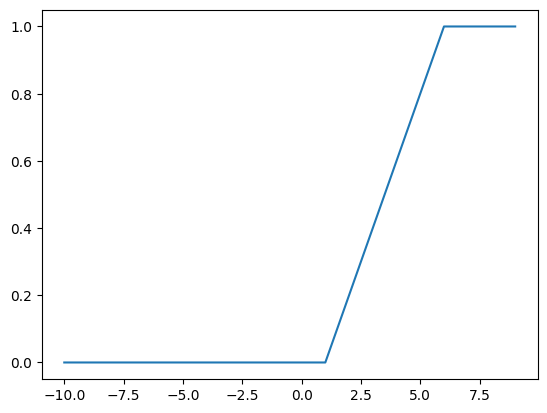

In [51]:
import sympy as sp

# 定义符号变量
x, a, b, x0 = sp.symbols('x a b x0')

# 定义分段函数，使用 a <= x & x <= b
P_x = sp.Piecewise(
    (1/(b-a), (a <= x) & (x <= b)),  # 当 a <= x <= b 时，返回 1/(b-a)
    (0, True)                        # 其他情况，返回 0
)


F_X = sp.integrate(P_x, (x, -sp.oo, x0))
print(sp.N(F_X.subs(x0, b)))



my_plot(F_X.subs({a:1, b:6}), x0, -10, 10)

In [57]:
import sympy as sp

lmda, x, x0 = sp.symbols('lambda x x0')
P_X = sp.Piecewise(
    (lmda*sp.exp(-lmda*x), x >= 0),
    (0, True)
)

# for i in range(5):
#     my_plot(P_X.subs(lmda, i), x, 0, 100)

F_X = sp.integrate(P_X, (x, -sp.oo, x0))

s, t = sp.symbols('s t')
result = sp.simplify(1 - F_X.subs(x0, t) - (1 - (1 - F_X.subs(x0, s+t))/(1 - F_X.subs(x0, s))))
print(result)

-exp(-lambda*Min(0, t)) + exp(-lambda*t) + (1 - exp(-lambda*Min(0, s + t)) + exp(-lambda*(s + t)))/(1 - exp(-lambda*Min(0, s)) + exp(-lambda*s))


In [1]:
import sympy as sp
import sympy.stats as st

# 定义正态分布
mu, sigma = sp.symbols('mu sigma')
X = st.Normal('X', mu, sigma)
print(type(X))
# 计算概率密度函数（PDF）
pdf = st.density(X)(sp.Symbol('x'))
print("正态分布 PDF:", pdf)

# 计算累积分布函数（CDF）
cdf = st.cdf(X)(sp.Symbol('x'))
print("正态分布 CDF:", cdf)

my_plot(cdf.subs({mu: 10, sigma: 5}), sp.Symbol('x'), -10, 30)
my_plot(pdf.subs({mu: 10, sigma: 5}), sp.Symbol('x'), -10, 30)

<class 'sympy.stats.rv.RandomSymbol'>
正态分布 PDF: sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)
正态分布 CDF: erf(sqrt(2)*(-mu + x)/(2*sigma))/2 + 1/2


NameError: name 'my_plot' is not defined